In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection.univariate_selection import SelectPercentile, SelectKBest
import numpy as np

In [2]:
digits_dataset = datasets.load_digits()
images_and_labels = list(zip(digits_dataset.images, digits_dataset.target))


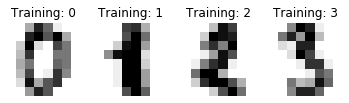

In [3]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [4]:
n_samples = len(digits_dataset.images)
n_samples

1797

In [5]:
digits_dataset.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
data = digits_dataset.images.reshape(n_samples, -1)
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
svm_clf = svm.SVC(gamma=0.001)
svm_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
expected = digits_dataset.target[n_samples // 2:]
predicted = svm_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [9]:
print(metrics.confusion_matrix(expected, predicted))

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


In [10]:
svm2_clf = svm.SVC(kernel='linear')
svm2_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = svm2_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.97      0.86      0.91        91
           4       0.99      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.87      0.93      0.90        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899



In [11]:
svm3_clf = svm.SVC(gamma=0.001, C=10)
svm3_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = svm3_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [12]:
rf_clf = RandomForestClassifier()
rf_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = rf_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.84      0.85      0.84        91
           2       0.93      0.91      0.92        86
           3       0.81      0.87      0.84        91
           4       0.89      0.89      0.89        92
           5       0.83      0.79      0.81        91
           6       0.96      0.99      0.97        91
           7       0.92      0.97      0.95        89
           8       0.94      0.66      0.77        88
           9       0.78      0.88      0.83        92

    accuracy                           0.88       899
   macro avg       0.88      0.88      0.88       899
weighted avg       0.88      0.88      0.88       899



/home/e/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
rf_clf = RandomForestClassifier()
rf_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = rf_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.88      0.84      0.86        91
           2       0.93      0.87      0.90        86
           3       0.78      0.86      0.82        91
           4       0.92      0.92      0.92        92
           5       0.81      0.87      0.84        91
           6       0.97      0.98      0.97        91
           7       0.88      0.89      0.88        89
           8       0.88      0.68      0.77        88
           9       0.78      0.82      0.80        92

    accuracy                           0.87       899
   macro avg       0.87      0.87      0.87       899
weighted avg       0.87      0.87      0.87       899



/home/e/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
rf2_clf = RandomForestClassifier(n_estimators=1000)
rf2_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = rf2_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.96      0.89      0.93        91
           2       0.99      0.92      0.95        86
           3       0.91      0.87      0.89        91
           4       0.98      0.95      0.96        92
           5       0.90      0.93      0.92        91
           6       0.98      1.00      0.99        91
           7       0.95      0.99      0.97        89
           8       0.91      0.89      0.90        88
           9       0.84      0.95      0.89        92

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899



In [15]:
rf3_clf = RandomForestClassifier(n_jobs=-1, n_estimators=1000)
rf3_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = rf3_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.96      0.89      0.93        91
           2       0.97      0.91      0.94        86
           3       0.91      0.85      0.87        91
           4       0.98      0.95      0.96        92
           5       0.89      0.93      0.91        91
           6       0.98      0.99      0.98        91
           7       0.94      0.99      0.96        89
           8       0.91      0.89      0.90        88
           9       0.84      0.96      0.89        92

    accuracy                           0.93       899
   macro avg       0.94      0.93      0.93       899
weighted avg       0.94      0.93      0.93       899



In [16]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = knn_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



In [17]:
knn1_clf = KNeighborsClassifier(n_neighbors=100, weights='distance')
knn1_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = knn1_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.95      0.79      0.86        91
           2       0.87      0.86      0.87        86
           3       0.74      0.88      0.80        91
           4       0.99      0.93      0.96        92
           5       0.87      0.85      0.86        91
           6       0.96      0.99      0.97        91
           7       0.90      0.99      0.94        89
           8       0.93      0.75      0.83        88
           9       0.80      0.86      0.83        92

    accuracy                           0.89       899
   macro avg       0.89      0.89      0.89       899
weighted avg       0.89      0.89      0.89       899



In [18]:
knn2_clf = KNeighborsClassifier(algorithm='ball_tree')
knn2_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = knn2_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



In [19]:
mnb_clf = MultinomialNB()
mnb_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = mnb_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.90      0.66      0.76        91
           2       0.85      0.87      0.86        86
           3       0.90      0.84      0.87        91
           4       0.91      0.93      0.92        92
           5       0.84      0.70      0.77        91
           6       0.98      0.98      0.98        91
           7       0.89      0.90      0.89        89
           8       0.77      0.83      0.80        88
           9       0.65      0.88      0.75        92

    accuracy                           0.86       899
   macro avg       0.87      0.86      0.86       899
weighted avg       0.87      0.86      0.86       899



In [20]:
mnb2_clf = MultinomialNB(alpha=0)
mnb2_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = mnb2_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.90      0.66      0.76        91
           2       0.82      0.87      0.85        86
           3       0.90      0.84      0.87        91
           4       0.90      0.93      0.91        92
           5       0.82      0.70      0.76        91
           6       0.98      0.98      0.98        91
           7       0.89      0.85      0.87        89
           8       0.76      0.81      0.78        88
           9       0.64      0.88      0.74        92

    accuracy                           0.85       899
   macro avg       0.86      0.85      0.85       899
weighted avg       0.86      0.85      0.85       899



/home/e/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [21]:
gnb_clf = GaussianNB()
gnb_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = gnb_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899



In [22]:
bnb_clf = BernoulliNB()
bnb_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = bnb_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.75      0.54      0.63        91
           2       0.87      0.80      0.84        86
           3       0.73      0.82      0.77        91
           4       0.94      0.92      0.93        92
           5       0.76      0.74      0.75        91
           6       0.95      0.97      0.96        91
           7       0.89      0.96      0.92        89
           8       0.72      0.66      0.69        88
           9       0.69      0.88      0.77        92

    accuracy                           0.83       899
   macro avg       0.83      0.83      0.82       899
weighted avg       0.83      0.83      0.82       899



In [23]:
sgd_clf = SGDClassifier()
sgd_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = sgd_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        88
           1       0.80      0.90      0.85        91
           2       1.00      0.95      0.98        86
           3       0.99      0.86      0.92        91
           4       0.99      0.88      0.93        92
           5       0.86      0.96      0.91        91
           6       0.92      1.00      0.96        91
           7       1.00      0.84      0.91        89
           8       0.90      0.82      0.86        88
           9       0.80      0.92      0.86        92

    accuracy                           0.91       899
   macro avg       0.92      0.91      0.91       899
weighted avg       0.92      0.91      0.91       899



In [24]:
sgd2_clf = SGDClassifier(alpha=2)
sgd2_clf.fit(data[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = sgd2_clf.predict(data[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.87      0.81      0.84        91
           2       0.94      0.98      0.96        86
           3       0.95      0.85      0.90        91
           4       0.96      0.93      0.95        92
           5       0.81      0.96      0.88        91
           6       0.97      0.99      0.98        91
           7       0.99      0.97      0.98        89
           8       0.91      0.77      0.83        88
           9       0.83      0.91      0.87        92

    accuracy                           0.91       899
   macro avg       0.92      0.91      0.91       899
weighted avg       0.92      0.91      0.91       899



In [25]:
ch2 = SelectPercentile(chi2, 80)
X_train = ch2.fit_transform(data, digits_dataset.target)
print(np.shape(data))
print(np.shape(X_train))

(1797, 64)
(1797, 51)


In [26]:
ch2.scores_

array([          nan,  811.90700411, 3501.28249552,  698.9252572 ,
        438.52969882, 3879.81925999, 3969.45823205, 1193.5608181 ,
         24.79521396, 2953.83108764, 2583.65198939,  388.24205944,
        824.69094853, 3676.48924765, 1983.5796061 ,  597.24198237,
          8.95886124, 1924.21690377, 2409.27140681, 3556.31594594,
       4871.94194551, 4782.19921618, 2155.17378998,  376.76583333,
          7.90090158, 2471.82418401, 4515.48149826, 2986.64314847,
       3724.09567634, 3208.64686641, 5138.07412439,   35.71270718,
                 nan, 5688.25079535, 5262.46646904, 3165.0605867 ,
       3231.63943369, 2532.99695611, 3288.81403655,           nan,
        142.85082873, 3863.85787901, 6416.0867248 , 5448.25154235,
       4079.73153383, 2134.02540236, 4486.34097862,  313.53898127,
         70.39927392,  449.72327313, 2801.97224468, 1527.54519627,
       1653.15892311, 3073.99803898, 5251.21748723,  683.88227339,
          9.15254237,  851.06791492, 3800.2473108 ,  730.92975

In [27]:
sgd3_clf = SGDClassifier(alpha=2)
sgd3_clf.fit(X_train[:n_samples // 2], digits_dataset.target[:n_samples // 2])
expected = digits_dataset.target[n_samples // 2:]
predicted = sgd3_clf.predict(X_train[n_samples // 2:])
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.86      0.80      0.83        91
           2       1.00      0.94      0.97        86
           3       0.95      0.85      0.90        91
           4       0.97      0.93      0.95        92
           5       0.90      0.95      0.92        91
           6       0.96      0.99      0.97        91
           7       0.99      0.99      0.99        89
           8       0.87      0.84      0.86        88
           9       0.80      0.92      0.86        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899



In [28]:
model1 = svm_clf
model2 = rf3_clf
model3= knn_clf

model4 = sgd3_clf
model5 = svm3_clf
model6= knn2_clf

x_train=data[:n_samples // 2]
y_train=digits_dataset.target[:n_samples // 2]
x_test=data[n_samples // 2:]
y_test=digits_dataset.target[n_samples // 2:]

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)
model6.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)
pred4=model1.predict(x_test)
pred5=model2.predict(x_test)
pred6=model3.predict(x_test)

In [ ]:
import statistics
final_pred = np.array([])
for i in range(0,len(x_test)):
    estimator=statistics.mode([pred1[i], pred2[i], pred3[i]])[0]
    final_model = np.append(final_pred,estimator)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

In [29]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('svm', model1), ('rf3', model2),('knn', model3), ('sgd3', model4),('svm3', model5), ('knn2', model6)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9632925472747497